In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model, Parameter, report_fit

df = pd.read_csv("BhaWT_20210208.csv", comment='#')
df.columns = ['Lt','Y']
df


,Lt,Y
0,0.000000e+00,0.013768
1,1.000000e-07,0.031235
2,5.000000e-07,0.010459
3,1.000000e-06,0.045515
4,2.000000e-06,0.122302
5,4.000000e-06,0.241532
6,5.000000e-06,0.361418
7,1.000000e-05,0.511943
8,2.000000e-05,0.682692
9,3.000000e-05,0.863608


(0, 6e-05)

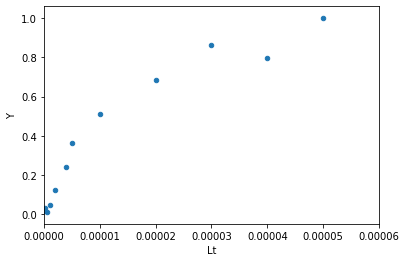

In [46]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

df.plot(x = 'Lt', y = 'Y', kind ='scatter')
plt.xlim([0, 0.00006])

In [48]:
def quadra(kd, x):  
  return ((kd+2e-6+x)-((kd+2e-6+x)**2-4*2e-6*x)**0.5)/(2*2e-6)
model = Model(quadra, independent_vars=['x'])
kd=1e-6
result = model.fit(df.Y, x=df.Lt, kd=kd)  

# fitted with both Kd and h against ANSHill model. The valid result of h can be only accepted when fitted Kd is reasonable.

result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
kd  7.969e-06     -inf      inf 9.279e-07     True     None     None


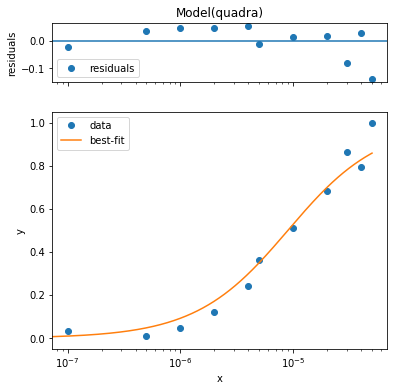

In [49]:
result.plot(numpoints=100000)
plt.xscale('log') 
plt.savefig('figure_massbalance.pdf', dpi=300)